1) Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see?

2) Take some time to explore `sklearn.mixture.GaussianMixture`. Check the documentation, some examples, the help menu, etc. You first need to define the model (instance of a class), and then train it on the data using the `fit` method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

*Note*. We'll do a more formal introduction to scikit-learn in one of the next lectures. This is meant to be a formative example on how you might find yourself dealing with a library you've never seen before. This happens *all the time* in scientific research!

3) Complete the fit 10 times with $N=1,...,10$ Gaussians. 

Note: `sklearn` by default will use the so-called [Expectation-Maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm), which is one of the many great things in data science we don't have time to study in detail.

4) For each of this fits, compute the AIC (easy! It's a attribute of the trained model!). Plot $N$ vs AIC: which model is preferred?

5) Plot the preferred solution on top of the input data. You should get a very nice fit!

6) Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset. 

*Hint:* Useful methods here are `score_samples` and `predict_proba`: you'll need them both. Try to understand what they do and how you can put them together.




----------
## My implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import scipy.stats as stats

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15

### Quick look at data

In [2]:
data = np.load('/Users/giuliamariaborro/box/reps/astrostatistics_bicocca_2022/solutions/formationchannels.npy')
print(data.shape)

(2950, 1)


Text(0, 0.5, 'distribution')

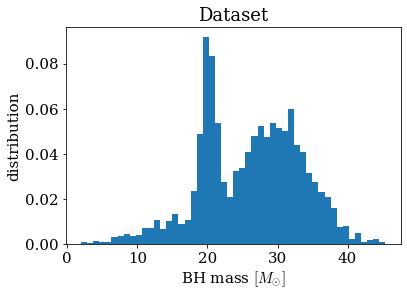

In [3]:
plt.hist(data, bins=50, density=True)
plt.title('Dataset')
plt.xlabel('BH mass $[M_{\odot}]$')
plt.ylabel('distribution')

### Quick model 

In the previous histogram it seems there are 4 Gaussians. 
Let's do a quick fit.

In [4]:
quickmodel = GaussianMixture(4).fit(data)     

Text(0, 0.5, 'pdf')

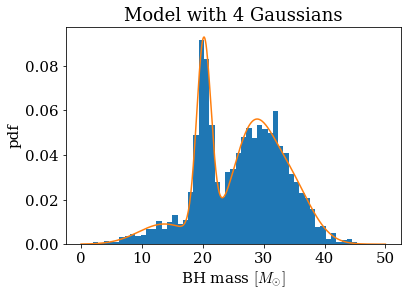

In [5]:
x = np.linspace(0,50,500)

plt.hist(data, bins=50, density=True);  
plt.plot(x, np.exp(quickmodel.score_samples(x[:, np.newaxis])))  
plt.title('Model with 4 Gaussians')
plt.xlabel('BH mass $[M_{\odot}]$')
plt.ylabel('pdf')

#---------------------------------------------------------------
#scores compiles the log-likelihood, so i need to do the exp
#model.score_samples(x) expects x to have 2 dimensions and not 1.
#x.shape is (500,), x.reshape(-1,1).shape is (500,1)
#so, model.score_samples(x.reshape(-1,1)).shape is (500)
#--------------------------------------------------------------------

### Model for N=1,...,10 Gaussians

In [6]:
N = np.arange(1,11)

In [7]:
model = [None for i in range(len(N))]
for i in range(len(N)):
    model[i] = (GaussianMixture(N[i])).fit(data)
    
print(model);

[GaussianMixture(), GaussianMixture(n_components=2), GaussianMixture(n_components=3), GaussianMixture(n_components=4), GaussianMixture(n_components=5), GaussianMixture(n_components=6), GaussianMixture(n_components=7), GaussianMixture(n_components=8), GaussianMixture(n_components=9), GaussianMixture(n_components=10)]


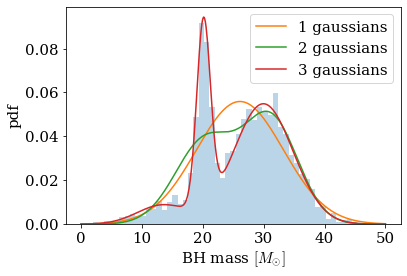

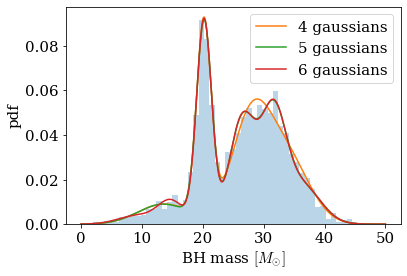

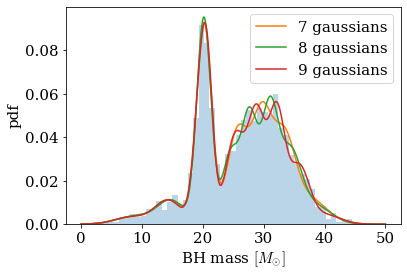

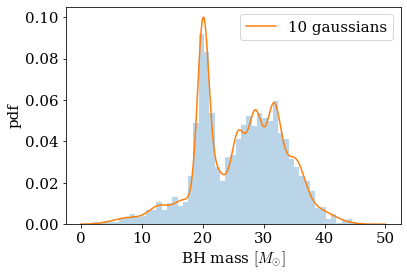

In [8]:
#just to have a visual idea of what happens

plt.hist(data, bins=50, density=True, alpha=0.3);
for i in np.arange(0,3):
    plt.plot(x, np.exp(model[i].score_samples(x.reshape(-1,1))), label=str(N[i])+' gaussians')
    plt.xlabel('BH mass $[M_{\odot}]$')
    plt.ylabel('pdf')
    plt.legend()

plt.show()
plt.clf()
plt.hist(data, bins=50, density=True, alpha=0.3);

for i in np.arange(3,6):
    plt.plot(x, np.exp(model[i].score_samples(x.reshape(-1,1))), label=str(N[i])+' gaussians')
    plt.xlabel('BH mass $[M_{\odot}]$')
    plt.ylabel('pdf')
    plt.legend()
    
plt.show()
plt.clf()
plt.hist(data, bins=50, density=True, alpha=0.3);

for i in np.arange(6,9):
    plt.plot(x, np.exp(model[i].score_samples(x.reshape(-1,1))), label=str(N[i])+' gaussians')
    plt.xlabel('BH mass $[M_{\odot}]$')
    plt.ylabel('pdf')
    plt.legend()
    
plt.show()
plt.clf()
plt.hist(data, bins=50, density=True, alpha=0.3);

for i in np.arange(9,10):
    plt.plot(x, np.exp(model[i].score_samples(x.reshape(-1,1))), label=str(N[i])+' gaussians')
    plt.xlabel('BH mass $[M_{\odot}]$')
    plt.ylabel('pdf')
    plt.legend()

### Akaike information criterion 

In [9]:
AIC = [None for i in range(len(N))]

for i in range(len(N)):
    AIC[i] = model[i].aic(data)

Text(0.5, 1.0, 'Akaike information criterion')

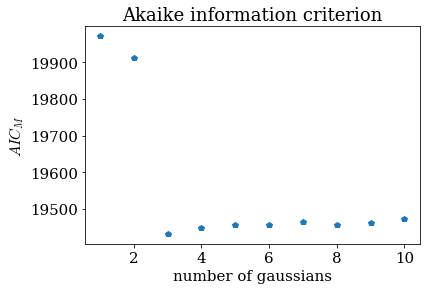

In [10]:
plt.plot(N, AIC, 'p')
plt.xlabel('number of gaussians') 
plt.ylabel('$AIC_{M}$')
plt.title('Akaike information criterion')

The preferred model has 3 Gaussians.

Text(0, 0.5, 'pdf')

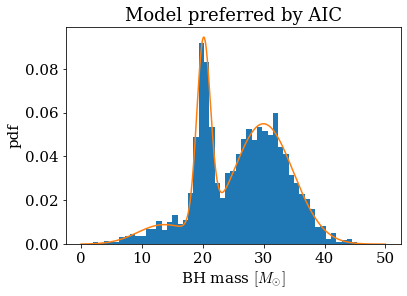

In [12]:
#preferred model
best = np.argmin(AIC) 
bestmodel = model[best]     

plt.hist(data, bins=50, density=True);
x = np.linspace(0,50,1000)  
plt.plot(x, np.exp(bestmodel.score_samples(x[:, np.newaxis])))

plt.title('Model preferred by AIC')
plt.xlabel('BH mass $[M_{\odot}]$')
plt.ylabel('pdf')

### Responsibilities

Which gaussian mode corresponds to which part of the imput dataset?

In [14]:
resp = bestmodel.predict_proba(x.reshape(-1,1))
resp.shape

(1000, 3)

Text(0.5, 1.0, 'responsibilities')

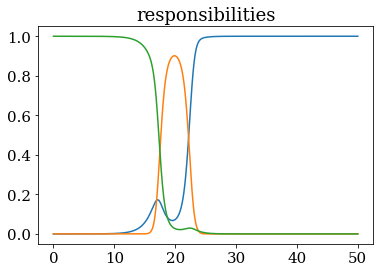

In [15]:
# just to see what happens in predict_proba
plt.plot(x, resp[:,0])
plt.plot(x, resp[:,1])
plt.plot(x, resp[:,2])

plt.title('responsibilities')

In [19]:
pdf = np.exp(bestmodel.score_samples(x[:, np.newaxis]))
Gaussmode = resp * pdf[:, np.newaxis]
print(resp.shape, pdf[:,np.newaxis].shape, Gaussmode.shape)

(1000, 3) (1000, 1) (1000, 3)


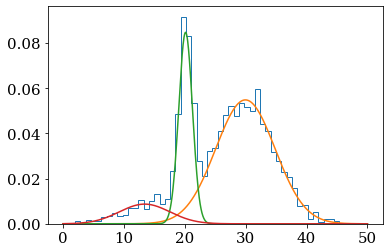

In [21]:
plt.hist(data, bins=50, density=True, histtype = 'step');
#plt.plot(x, pdf)
plt.plot(x, Gaussmode[:,0])
plt.plot(x, Gaussmode[:,1])
plt.plot(x, Gaussmode[:,2])

### Cross-validation

In [16]:
from sklearn.model_selection import GridSearchCV

clf = GaussianMixture(random_state=42)
ncomp = np.arange(1,11)

grid = GridSearchCV(clf, {'n_components':ncomp}, cv=10)
grid.fit(data.reshape(-1,1))

GridSearchCV(cv=10, estimator=GaussianMixture(random_state=42),
             param_grid={'n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [17]:
grid.best_params_['n_components']

8

##### GridSearch cross validation gives 8! 


##### What if I use Bayesian optimization?

In [6]:
pip install scikit-optimize

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.2 MB/s eta 0:00:00a 0:00:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near fut

In [18]:
from skopt import BayesSearchCV

opt = BayesSearchCV(clf, {'n_components':ncomp}, cv=10)
opt.fit(data.reshape(-1,1))

/usr/local/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.9/site-packa

BayesSearchCV(cv=10, estimator=GaussianMixture(random_state=42),
              search_spaces={'n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [19]:
opt.best_params_

OrderedDict([('n_components', 8)])

##### I get the same result!